In [26]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cv2
from lib.reader import *
from lib.helpers import *
from lib.imports import *
from lib.filters import *
from lib.visualize import *

plt.rcParams['figure.facecolor'] = 'white'
import sys

sys.path.append('M:\\Betrieb_ISF\\Gruppe_A_Orga\\Arbeitsgebiete\\Python_Auswerteskripte')
import imports as imp

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

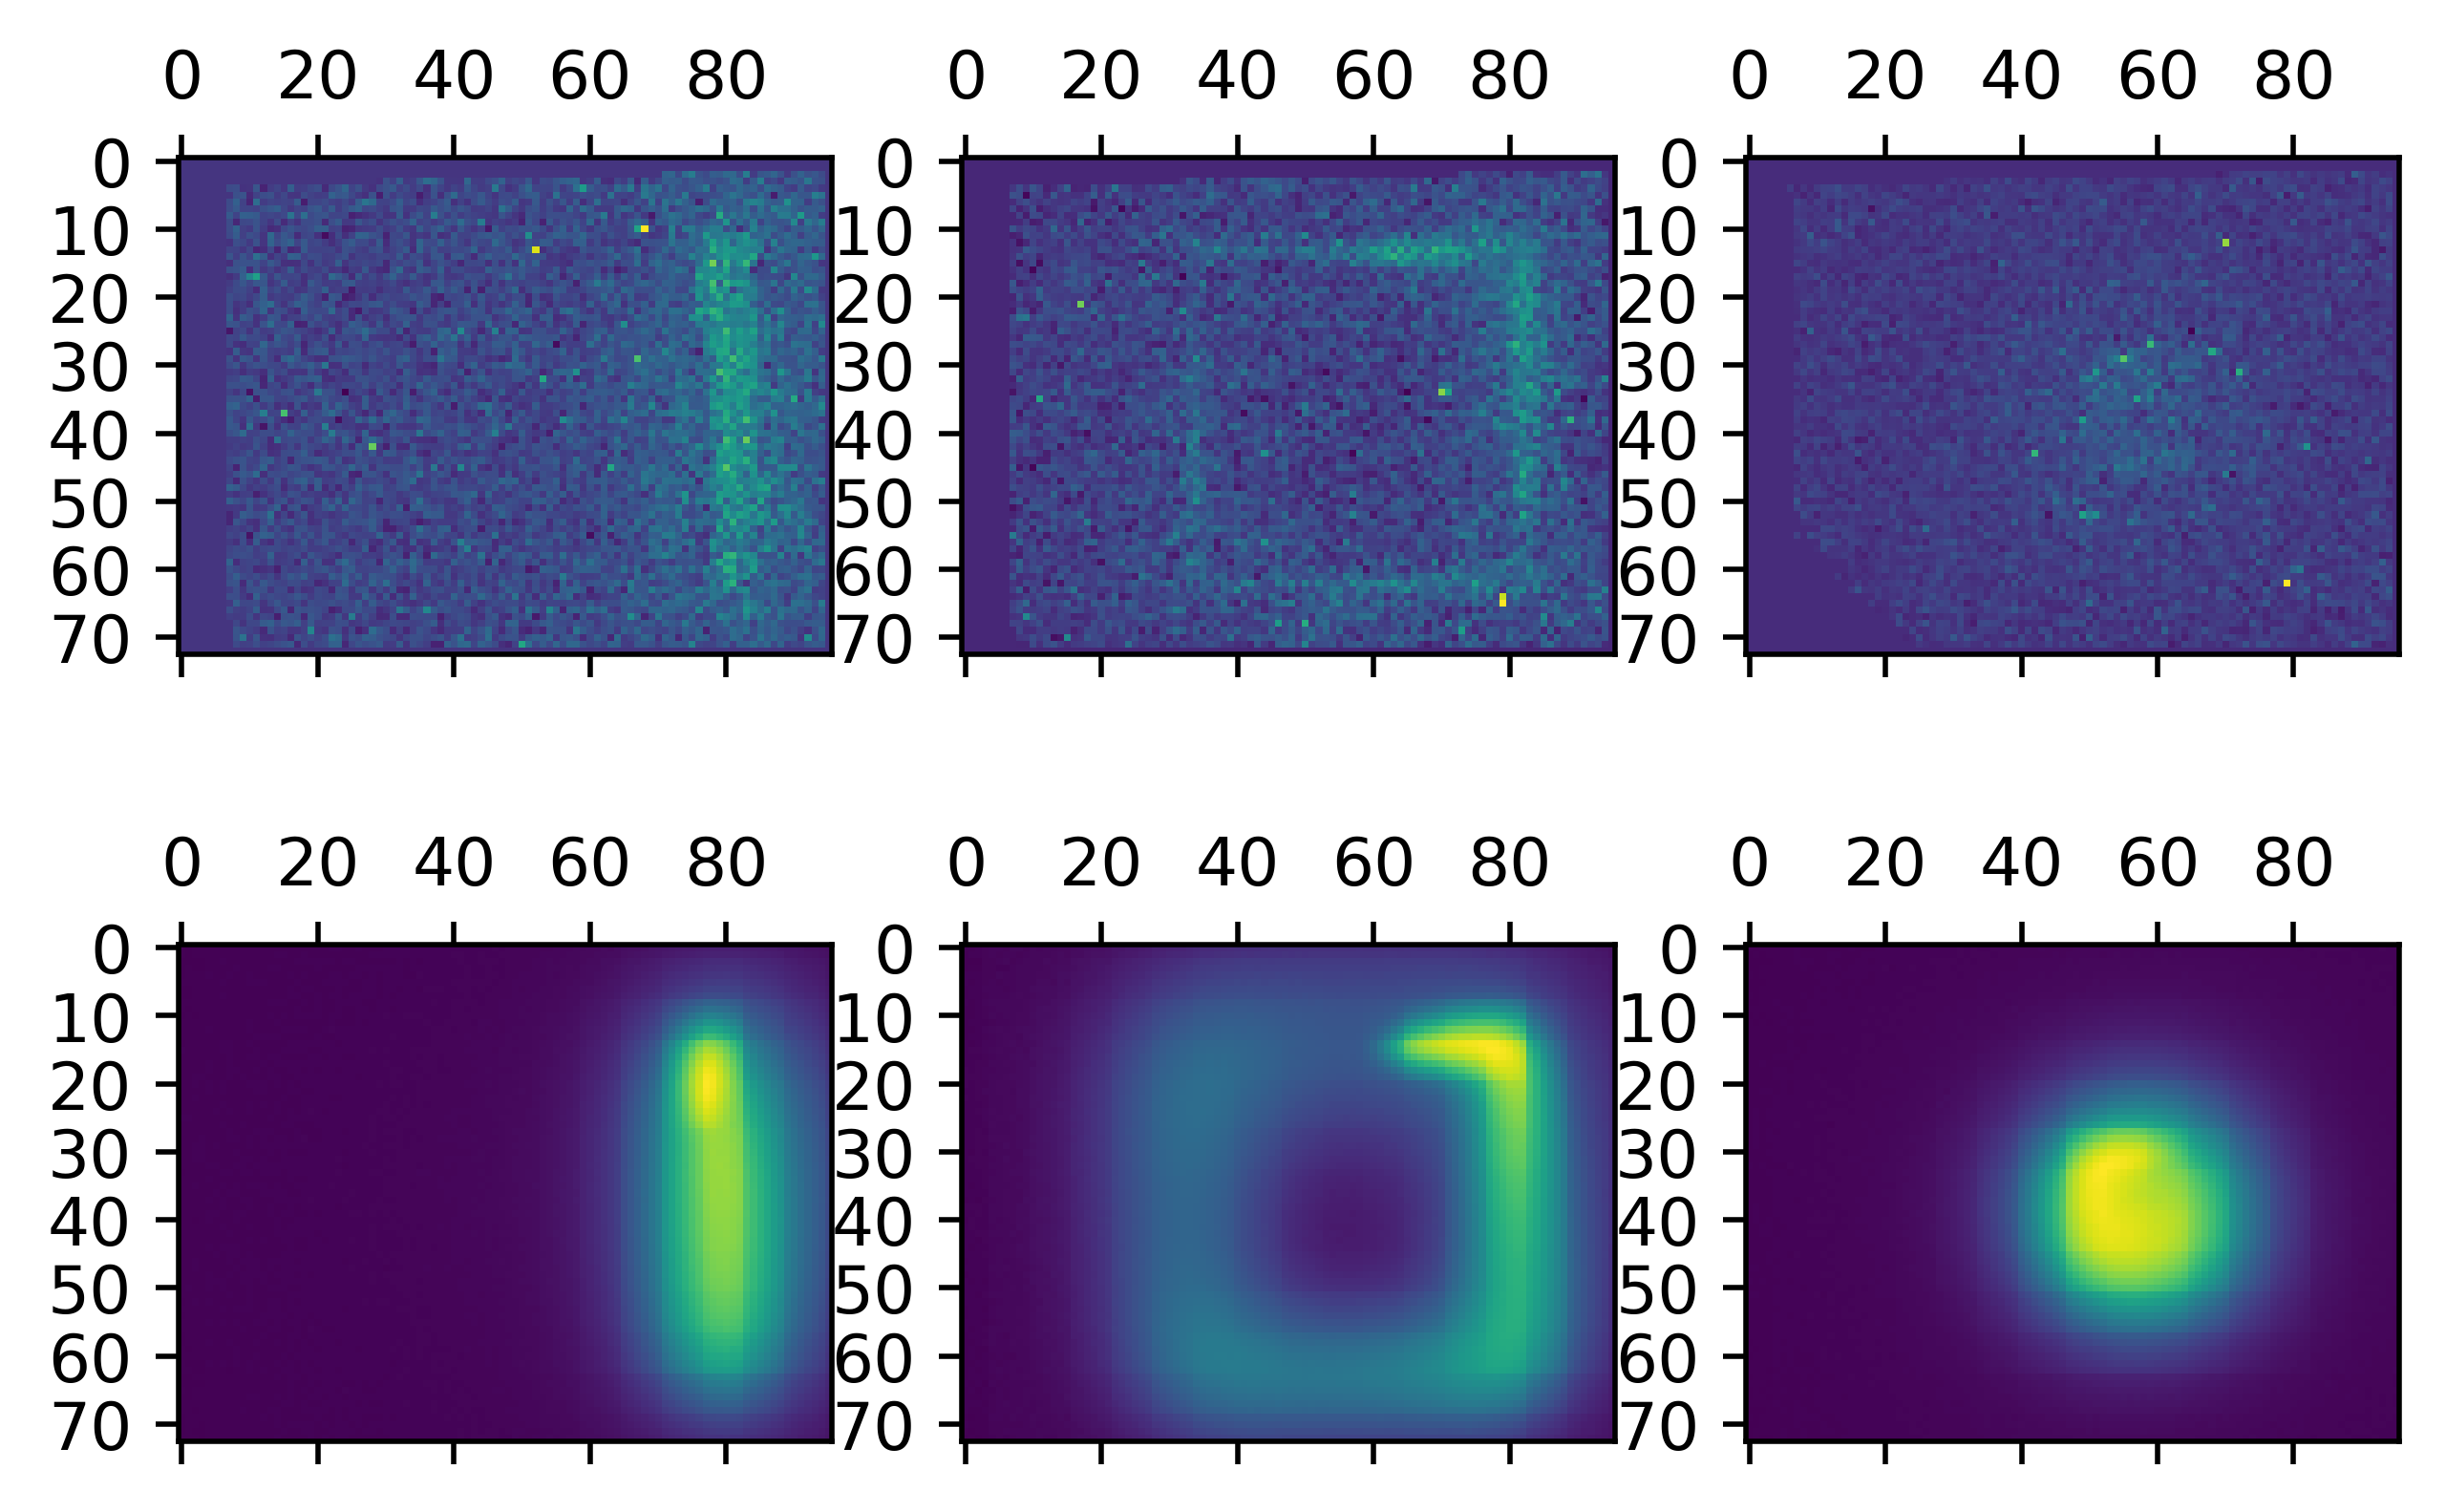

In [31]:
xmal=pd.read_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\meander.pickle')
xial=pd.read_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\nachinnen.pickle')
xaal=pd.read_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\nachaußen.pickle')


fig,ax=plt.subplots(2,3,dpi=500)
ax[0,0].matshow(xmal.iloc[100,:][(      'strains',                   'strain_p1')])
ax[0,1].matshow(xial.iloc[100,:][(      'strains',                   'strain_p1')])
ax[0,2].matshow(xaal.iloc[100,:][(      'strains',                   'strain_p1')])
ax[1,0].matshow(xmal.iloc[100,:][('attributes','ravi_cropped')])
ax[1,1].matshow(xial.iloc[100,:][('attributes','ravi_cropped')])
ax[1,2].matshow(xaal.iloc[100,:][('attributes','ravi_cropped')])
ax[1,2].colorbar()

In [28]:
display(xmal.columns)

MultiIndex([(  'coordinates',      'contour_thickness_mask'),
            (  'coordinates',                'coordinate_x'),
            (  'coordinates',            'coordinate_x_var'),
            (  'coordinates',                'coordinate_y'),
            (  'coordinates',            'coordinate_y_var'),
            (  'coordinates',                'coordinate_z'),
            (  'coordinates',            'coordinate_z_var'),
            (  'coordinates',           'distance_to_plane'),
            (  'coordinates',          'distance_to_sphere'),
            (  'coordinates',                        'mask'),
            (  'coordinates',             'variance_sphere'),
            ('displacements',          'displacement_total'),
            ('displacements',     'displacement_total_rbmr'),
            ('displacements', 'displacement_total_rbmr_var'),
            ('displacements',      'displacement_total_var'),
            ('displacements',              'displacement_x'),
        

185.8

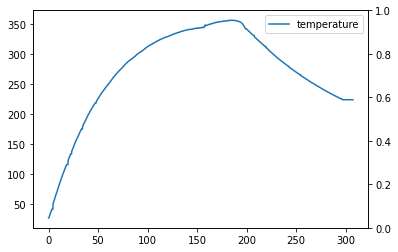

In [36]:
frame=xial
point=[50,50]
temp    =[]
strainx  =[]
strainy=[]
strainp1=[]
time=frame.loc[:,(   'attributes',                      'time_s')]
for i in frame.index:
    temp.append(frame.loc[i,('attributes','ravi_cropped')].mean())
    strainx.append(abs(frame.loc[i,(      'strains',                   'strain_xx')].mean()))
    strainy.append(abs(frame.loc[i,(      'strains',                   'strain_yy')].mean()))
    strainp1.append(abs(frame.loc[i,(      'strains',                   'strain_p1')].mean()))


maxval=max(temp)
display(time[temp.index(maxval)])

fig,ax=plt.subplots()
twinax=ax.twinx()

#b=twinax.plot(time,strainx,color='orange',label='strain_xx')
#c=twinax.plot(time,strainy,color='red',label='strain_yy')
#d=twinax.plot(time,strainp1,color='green',label='strain_p1')
a=ax.plot(time,temp,label='temperature',zorder=10)
ax.legend()
plt.show()


In [37]:
#[5:70,20:85]

kl=pd.read_csv('M:\\Betrieb_ISF\\Gruppe_A_Orga\\Arbeitsgebiete\\Python_Auswerteskripte\\RAVI-Kennlinien\\Kennlinie-19104059-29-150-900.prn', header=None, names=['key', 'degree_C'], sep='\s+')
kl=dict(zip(kl['key'],kl['degree_C']))
kl

for i in xial.index:
    xial.at[i,('attributes','ravi_cropped')]=np.vectorize(kl.get)(xial.loc[i,('attributes','ravi_cropped')])
print('done3')

xmal.to_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\meander.pickle')
xial.to_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\nachinnen.pickle')
xaal.to_pickle('Y:\\Data\\DAP\\calibrated_synced_data\\nachaußen.pickle')

In [ ]:
display(xmal.head())
display(xaal.head())
display(xial.head())

## Results
DIC-Displacement-Possibilities

D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_560.hdf5


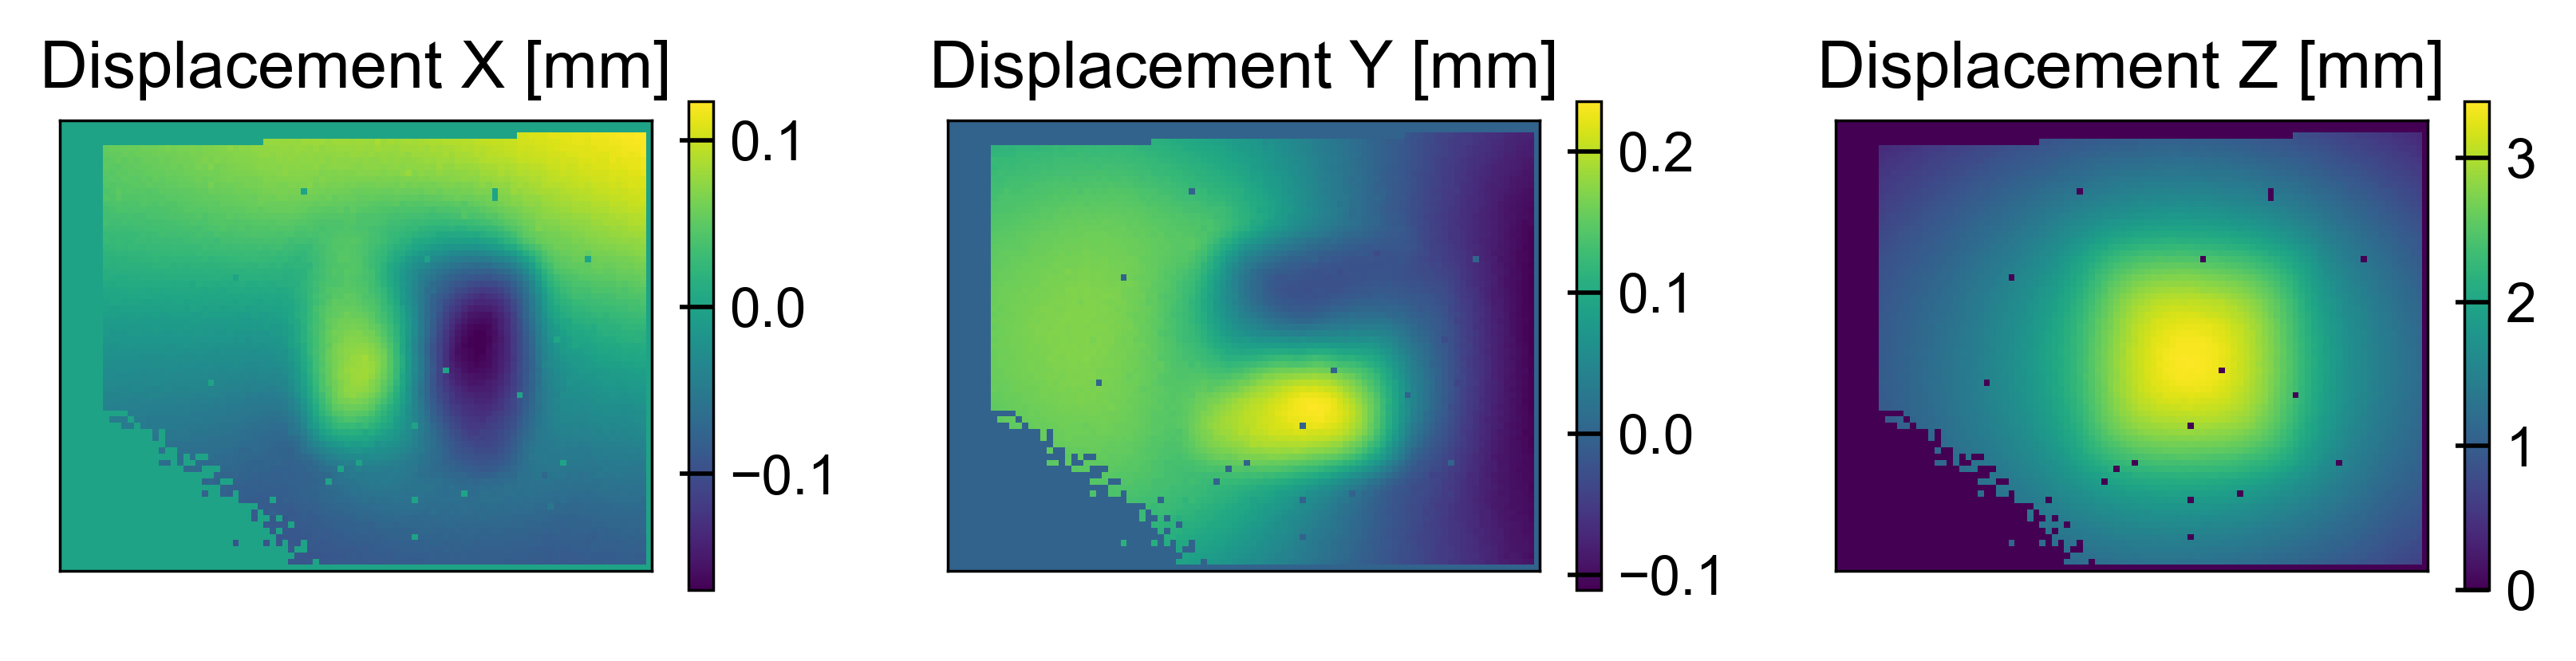

In [200]:
plt.style.use('M:\\Öff gef Forschung\\Projekte\SFB 1120 Präzision\\Bearbeiterordner\\A2\\Veröffentlichungen\\bearbeiteordner\\DIC-displacement.mplstyle')
cm=2.54
ind=xaal.loc[xaal[('attributes','time_s')]==100,:].index[0]

print(ind)
fig,ax=plt.subplots(ncols=3,figsize=(18/cm,5/cm))

ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

ax[0].set_title('Displacement X [mm]')
ax[1].set_title('Displacement Y [mm]')
ax[2].set_title('Displacement Z [mm]')
x=ax[0].imshow(xaal.loc[ind,('displacements','displacement_x')])
y=ax[1].imshow(xaal.loc[ind,('displacements','displacement_y')])
z=ax[2].imshow(xaal.loc[ind,('displacements','displacement_z')])
cbx=plt.colorbar(x,ax=ax[0],shrink=0.70)
cby=plt.colorbar(y,ax=ax[1],shrink=0.70)
cbz=plt.colorbar(z,ax=ax[2],shrink=0.70)

plt.show()
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\dispxyv100s.png',dpi=700)

DIC-Displacement-Possibilities

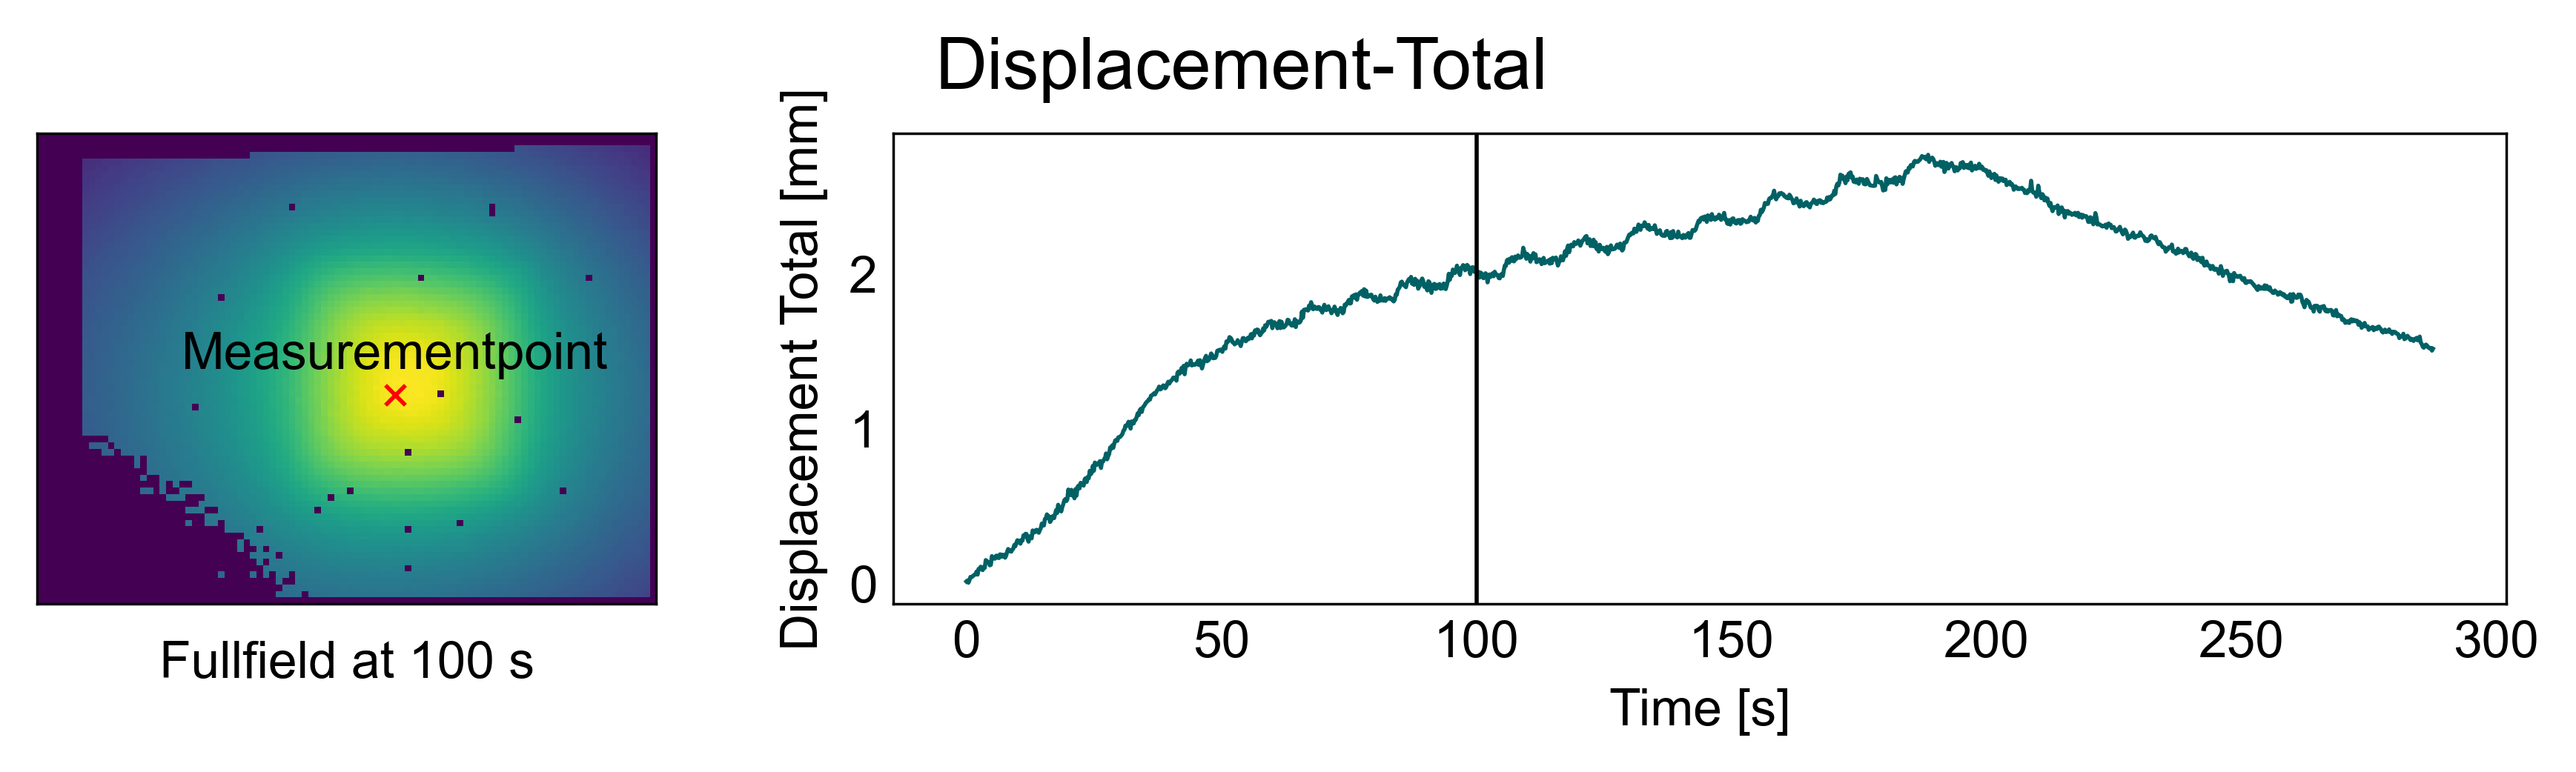

In [219]:
plt.style.use('M:\\Öff gef Forschung\\Projekte\SFB 1120 Präzision\\Bearbeiterordner\\A2\\Veröffentlichungen\\bearbeiteordner\\DIC-displacement.mplstyle')
cm=2.54
pos=[55,40]
fig, axd = plt.subplot_mosaic([['tot', 'dt','dt']],
                              figsize=(18/cm,5/cm), constrained_layout=True)
axd['tot'].set_xticklabels([])
axd['tot'].set_yticklabels([])
fig.suptitle('Displacement-Total',fontsize=14)
axd['tot'].imshow(xaal.loc[ind,('displacements','displacement_total')])
axd['tot'].scatter(pos[0],pos[1],s=15,marker='x',c='red')
axd['tot'].set_xlabel('Fullfield at 100 s')
axd['tot'].text(pos[0],pos[1]-4,'Measurementpoint',ha='center')

axd['dt'].set_ylabel('Displacement Total [mm]')
axd['dt'].set_xlabel('Time [s]')
axd['dt'].plot([xaal.loc[i,('attributes','time_s')]for i in xaal.index if xaal.loc[i,('displacements','displacement_total')][pos[0],pos[1]]!=0],[xaal.loc[i,('displacements','displacement_total')][pos[0],pos[1]]for i in xaal.index if xaal.loc[i,('displacements','displacement_total')][pos[0],pos[1]]!=0])
axd['dt'].axvline(100,c='k')
plt.show()
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\disptotalpointtransient.png',dpi=700)

(96, 1439)


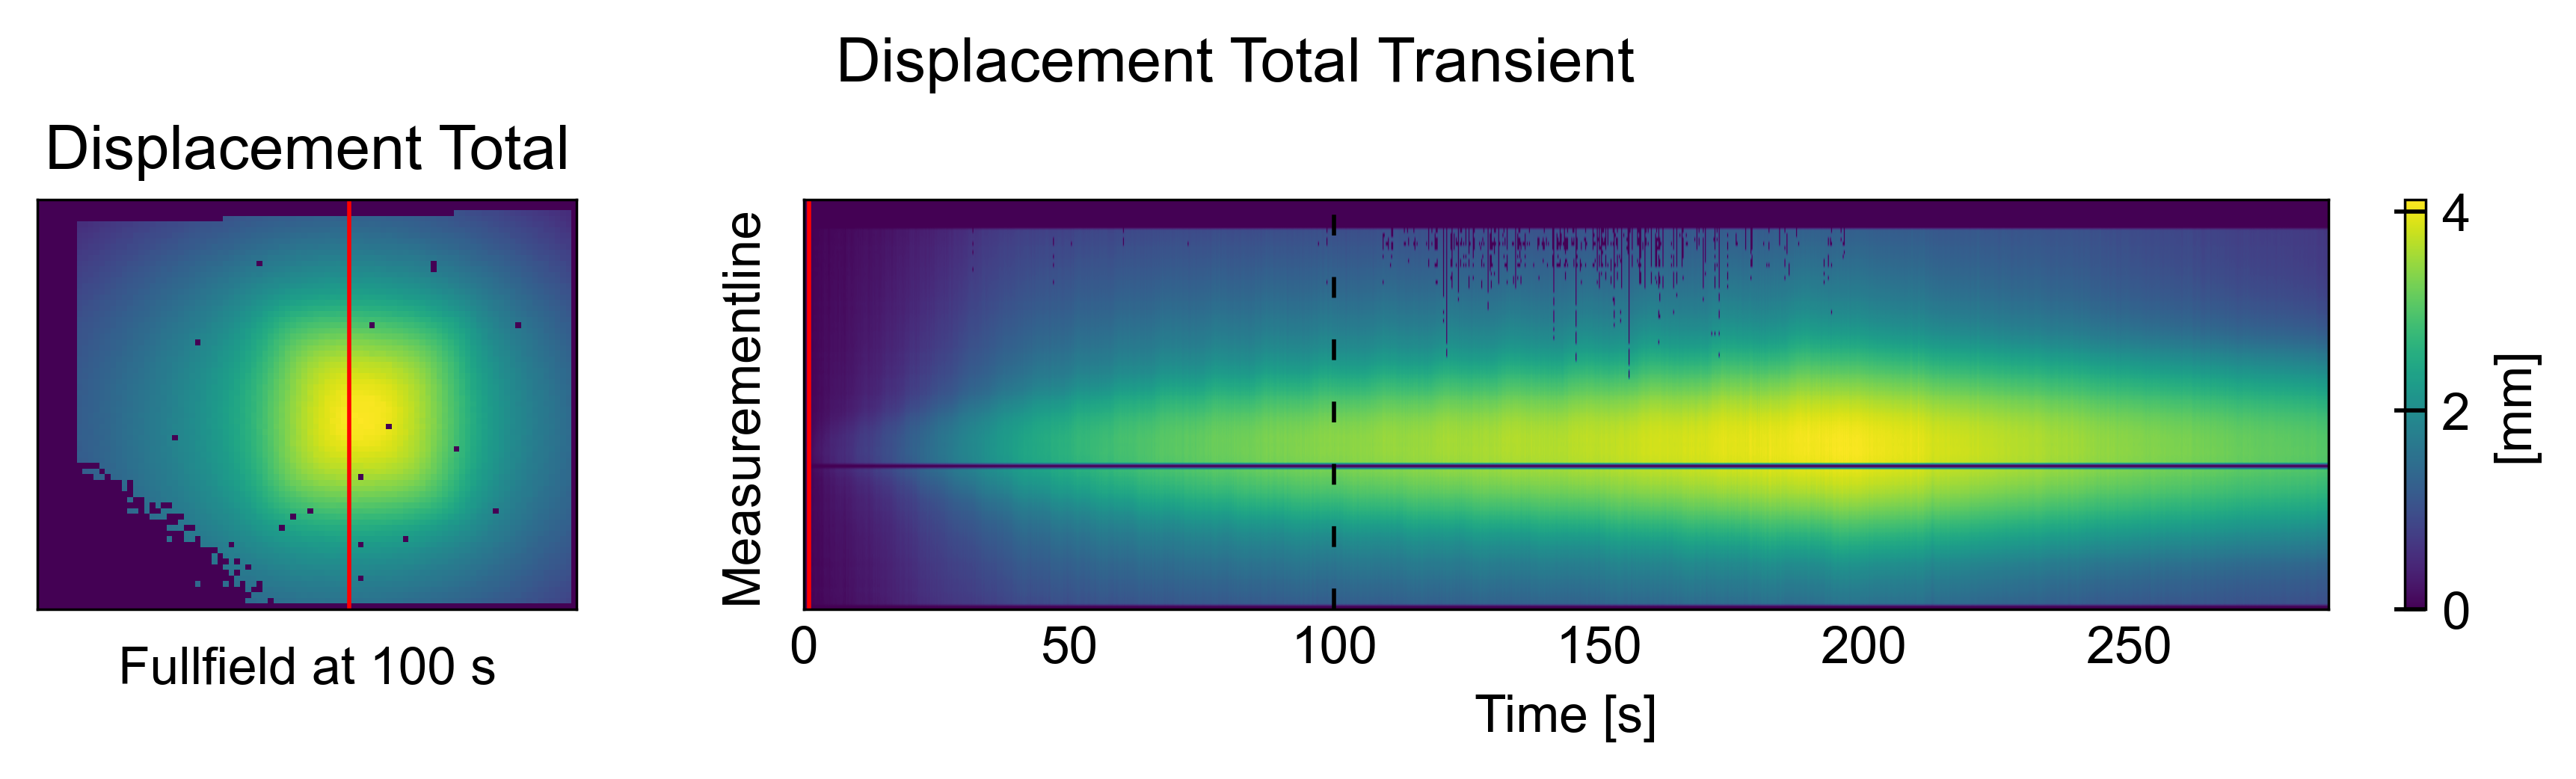

In [221]:
plt.style.use('M:\\Öff gef Forschung\\Projekte\SFB 1120 Präzision\\Bearbeiterordner\\A2\\Veröffentlichungen\\bearbeiteordner\\DIC-displacement.mplstyle')
cm=2.54
pos=[55,40]
maxtime=xaal.loc[:,('attributes','time_s')].max()
fig, axd = plt.subplot_mosaic([['tot', 'dt','dt']],
                              figsize=(18/cm,5/cm), constrained_layout=True)
axd['tot'].set_xticklabels([])
axd['tot'].set_yticklabels([])
axd['tot'].set_title('Displacement Total')
axd['tot'].imshow(xaal.loc[ind,('displacements','displacement_total')])
axd['tot'].axvline(pos[0],c='red')
axd['tot'].set_xlabel('Fullfield at 100 s')
#ax.scatter(pos[0],pos[1],s=15,marker='x',c='k')

a=[xaal.loc[i,('displacements','displacement_total')][pos[1],:] for i in xaal.index]
a=np.stack(a,axis=1)
print(a.shape)


axd['dt'].set_ylabel('Measurementline')
axd['dt'].set_xlabel('Time [s]')
fig.suptitle('Displacement Total Transient')
tot=axd['dt'].imshow(a,aspect='auto',extent=[0,maxtime,0,50])
axd['dt'].tick_params(axis='x',which='major',length=6)
axd['dt'].set_yticklabels([])
axd['dt'].axvline(100,c='k',ls='--')
axd['dt'].axvline(1,c='red',ls='-')
cbtot=plt.colorbar(tot,ax=axd['dt'])
cbtot.set_label('[mm]')
plt.show()
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\disptotallinetransient.png',dpi=700)

D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_560.hdf5


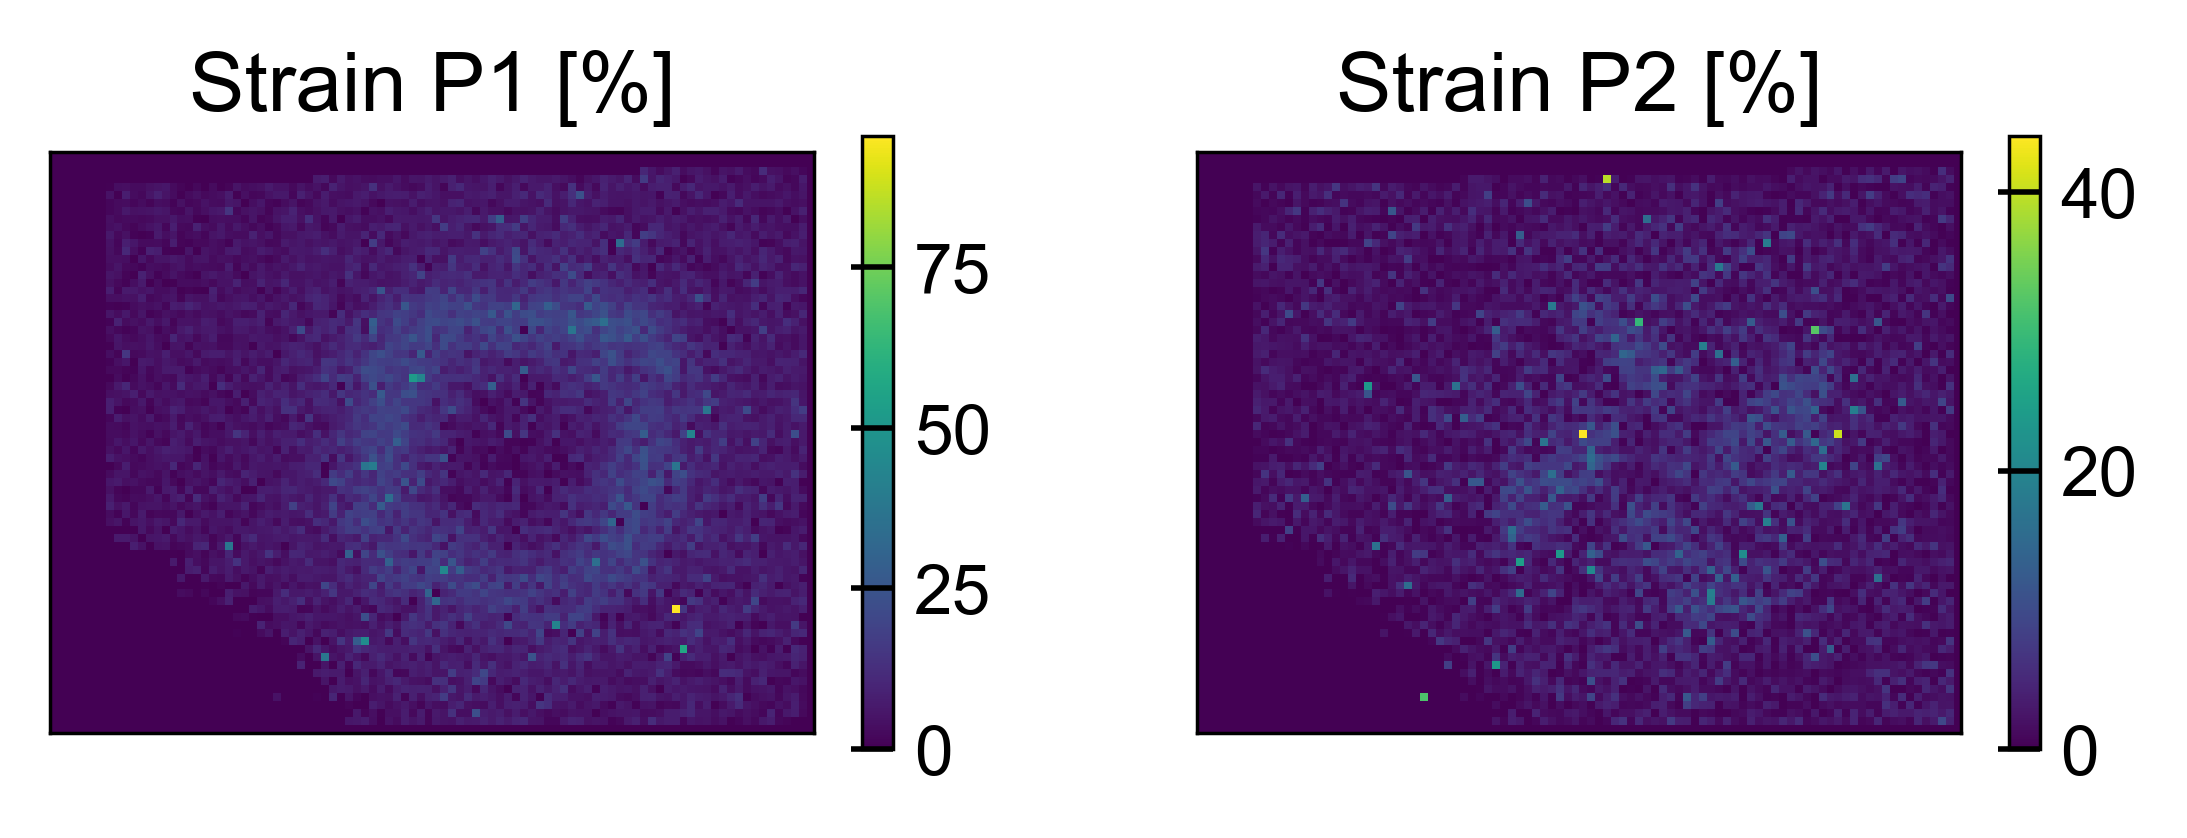

In [222]:
plt.style.use('M:\\Öff gef Forschung\\Projekte\SFB 1120 Präzision\\Bearbeiterordner\\A2\\Veröffentlichungen\\bearbeiteordner\\DIC-displacement.mplstyle')
cm=2.54
ind=xaal.loc[xaal[('attributes','time_s')]==100,:].index[0]

print(ind)
fig,ax=plt.subplots(ncols=2,figsize=(12/cm,5/cm))

ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])


ax[0].set_title('Strain P1 [%]')
ax[1].set_title('Strain P2 [%]')


x=ax[0].imshow(np.absolute(xaal.loc[ind,('strains','strain_p1')]))
y=ax[1].imshow(np.absolute(xaal.loc[ind,('strains','strain_p2')]))

cbx=plt.colorbar(x,ax=ax[0],shrink=0.70)
cby=plt.colorbar(y,ax=ax[1],shrink=0.70)


plt.show()
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\strainp1p2.png',dpi=700)

D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_60.hdf5        0.0
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_176.hdf5      23.2
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_293.hdf5      46.6
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_410.hdf5      70.0
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_526.hdf5      93.2
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_643.hdf5     116.6
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_760.hdf5     140.0
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_876.hdf5     163.2
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_993.hdf5     186.6
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1110.hdf5    210.0
Name: (attributes, time_s), dtype: float64

(73, 96)


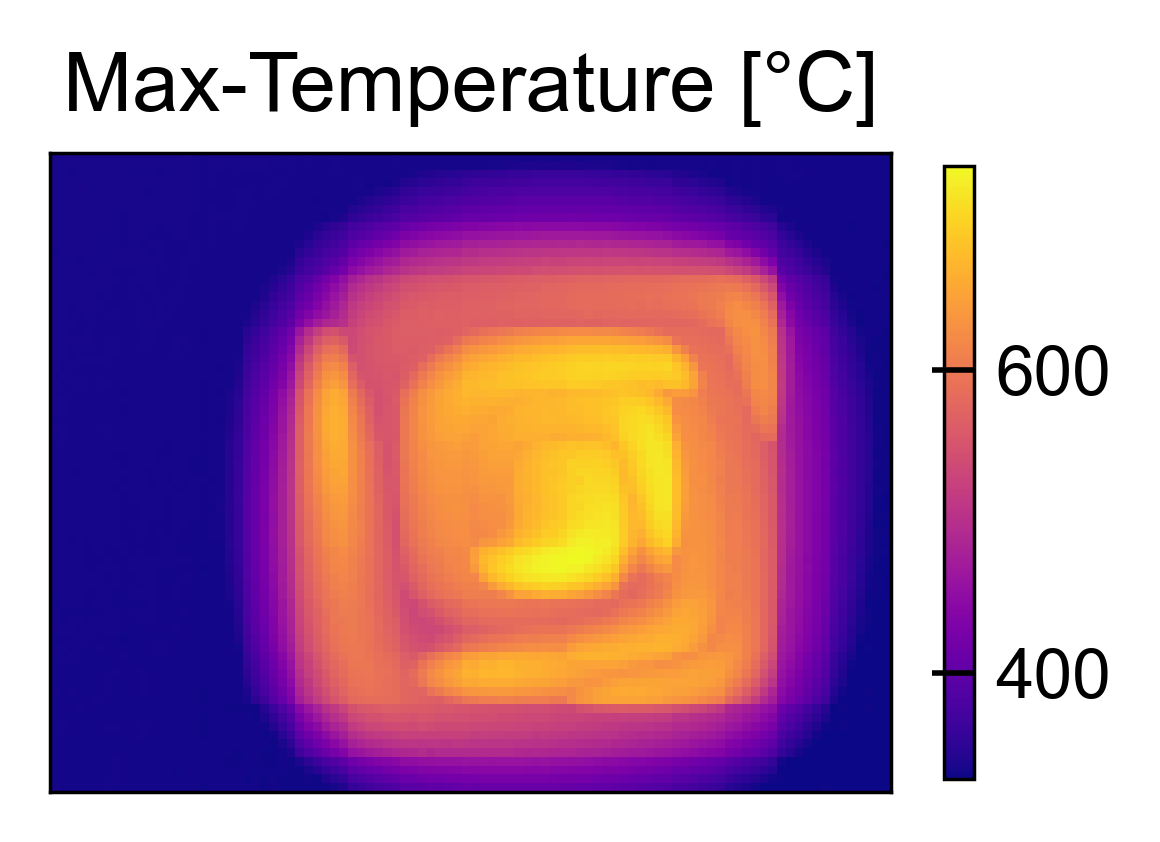

In [226]:

ind190=xaal.loc[xaal[('attributes','time_s')]==210,:].index[0]
ind190pos=xaal.index.get_loc(ind190)
steps=np.linspace(0,ind190pos,10,dtype=int)
display(xaal.loc[xaal.index[steps],('attributes','time_s')])
df=pd.DataFrame(columns=steps)
shp=xaal.loc[xaal.index[0],('attributes','ravi_cropped')].shape
for col in df.columns:
    """plt.matshow(xaal.loc[xaal.index[col],('attributes','ravi_cropped')])
    plt.colorbar()"""

    df[col]=np.ndarray.flatten(xaal.loc[xaal.index[col],('attributes','ravi_cropped')])
df['max']=df.max(axis=1)
print(shp)
arr=df['max'].values.reshape(shp)

fig,ax=plt.subplots(ncols=1,figsize=(6/cm,5/cm))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('Max-Temperature [°C]')
x=ax.imshow(arr,cmap='plasma')
plt.colorbar(x,shrink=0.7)
plt.show()
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\multtimetempmax0-23-46-70-93-116-140-163-186-210.png',dpi=700)

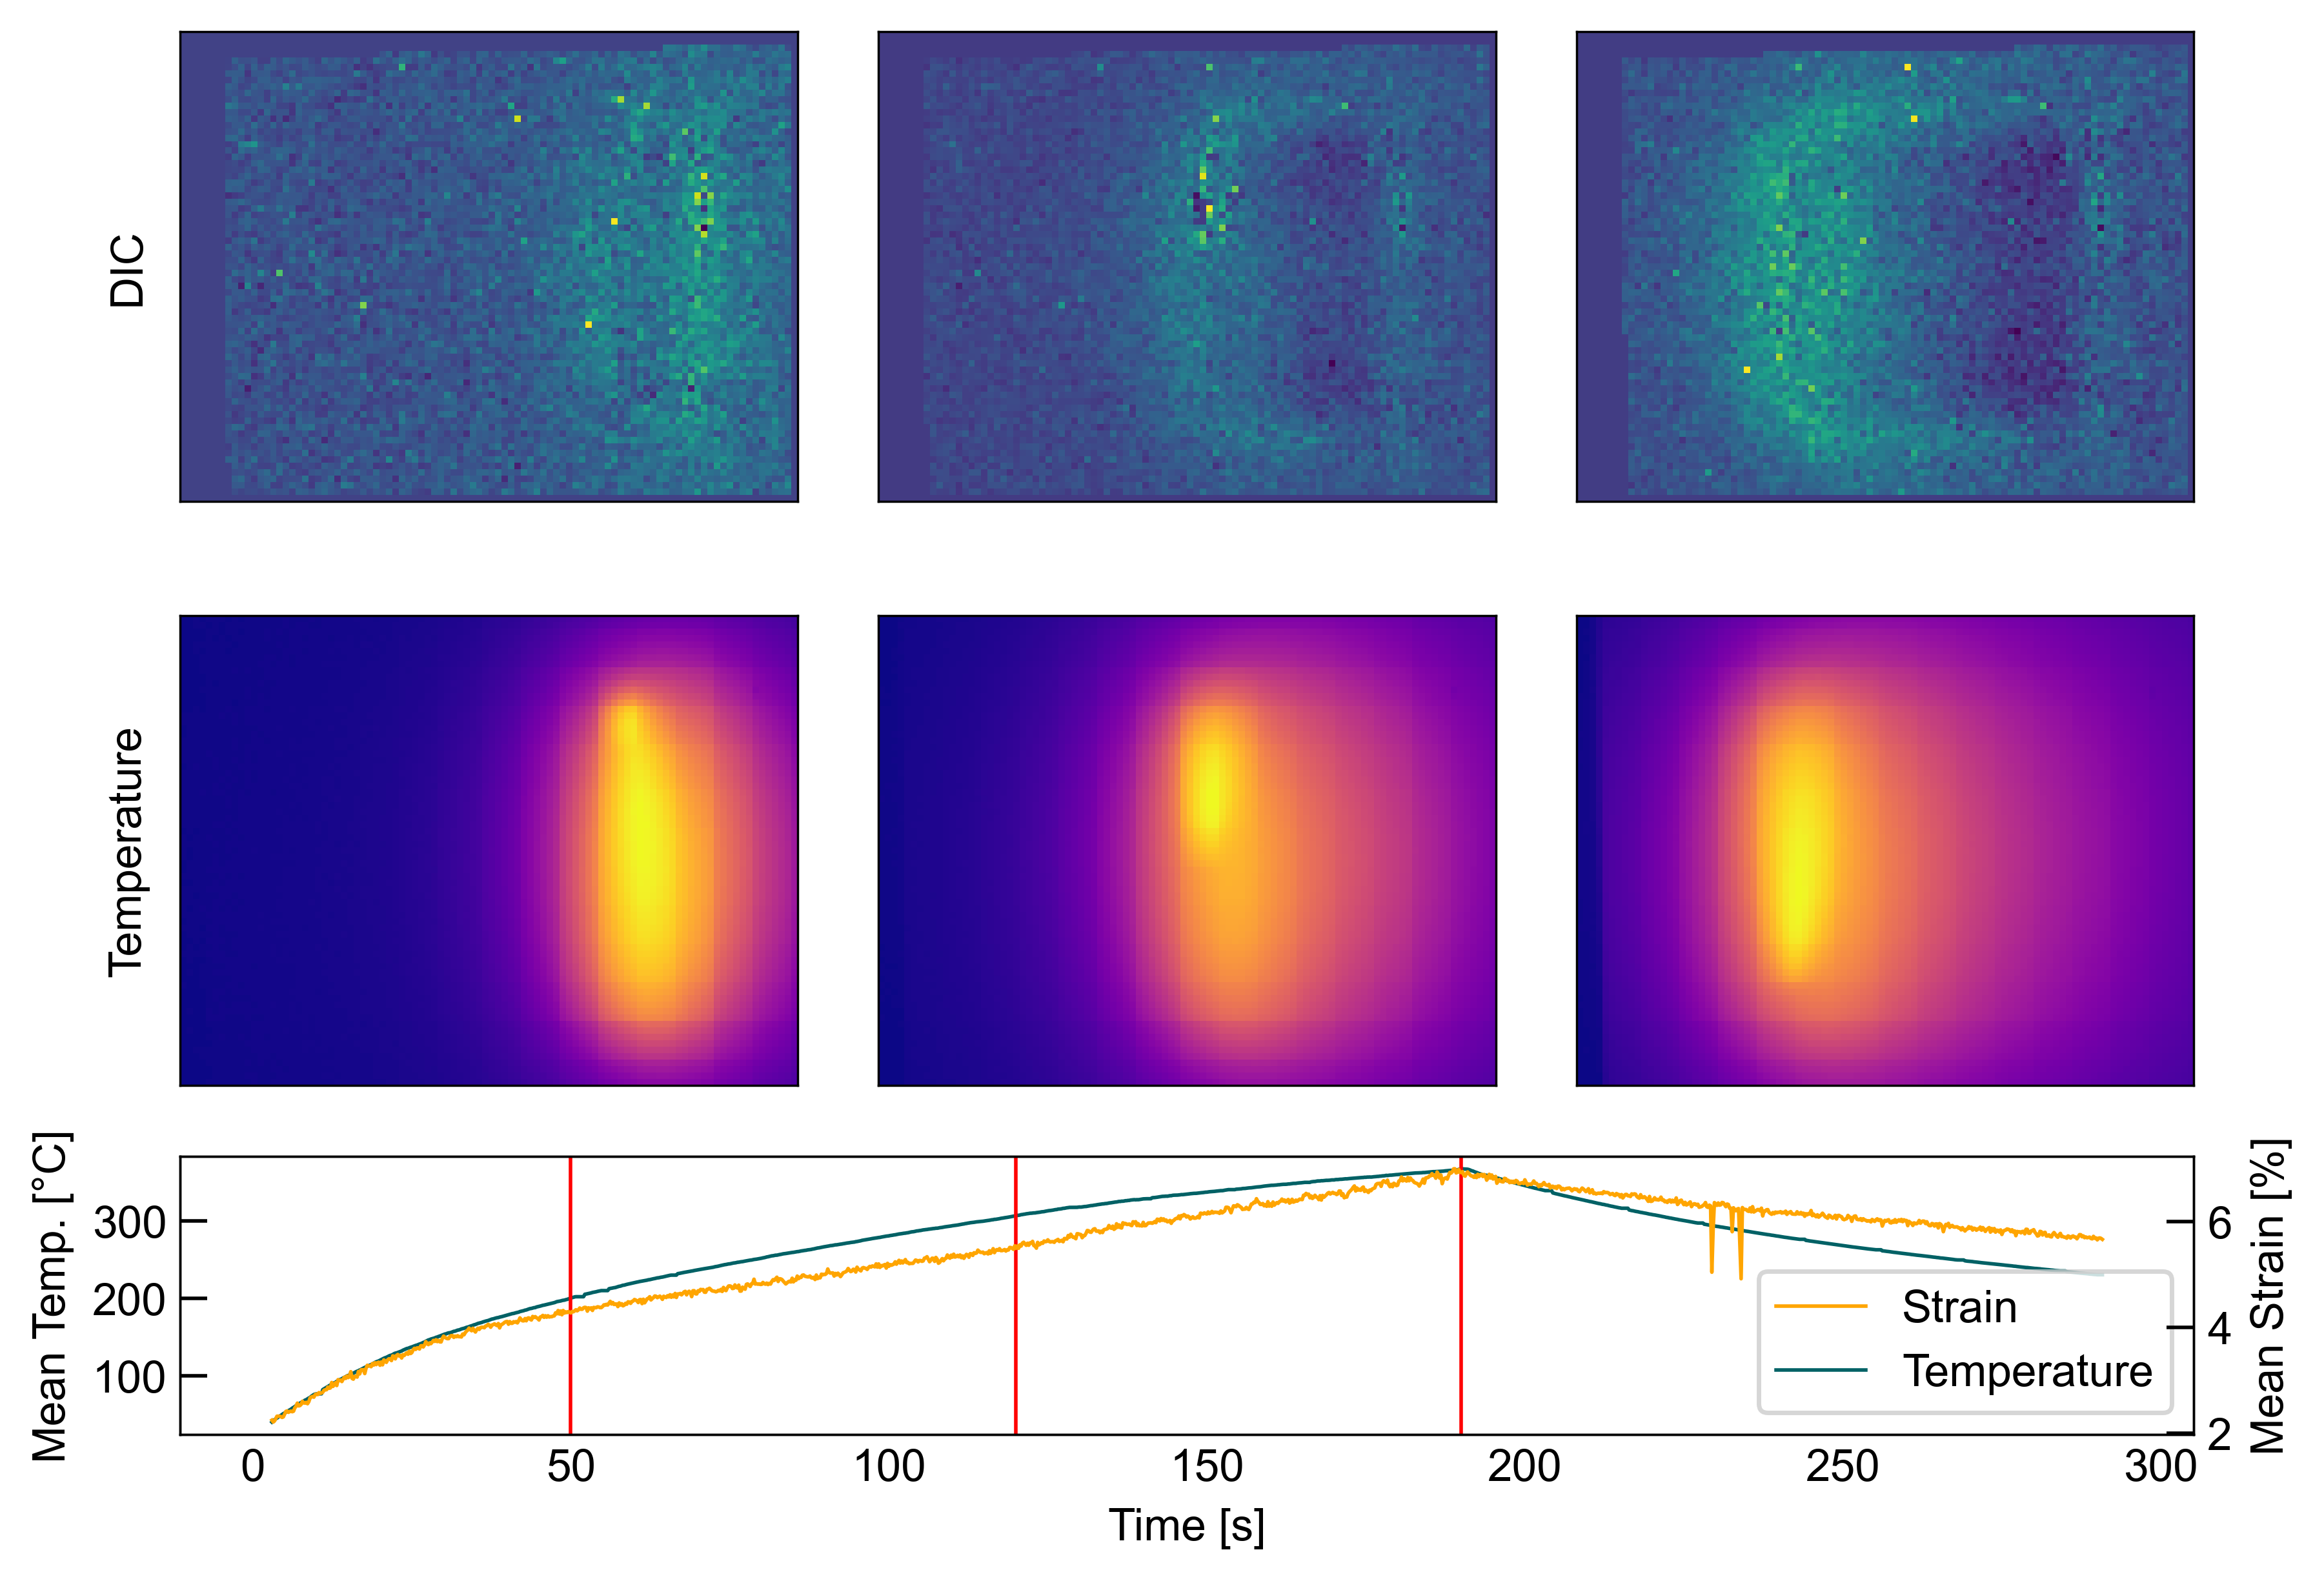

In [229]:
df=xmal
fig, axd = plt.subplot_mosaic([['dic1', 'dic2','dic3'],
                               ['dic1', 'dic2','dic3'],
                               ['t1', 't2','t3'],
                               ['t1', 't2','t3'],
                               ['mt','mt','mt']],
                              figsize=(18/cm,12.5/cm), constrained_layout=True)
for key in list(axd.keys())[:-1]:
    axd[key].set_yticklabels([])
    axd[key].set_xticklabels([])
lns2=axd['mt'].plot(df.loc[:,('attributes','time_s')][15:],[df.loc[i,('attributes','ravi_cropped')].mean()for i in df.index][15:],label='Temperature')
twinx=axd['mt'].twinx()
lns1=twinx.plot(df.loc[:,('attributes','time_s')][15:],[df.loc[i,('strains','strain_p1')].mean()for i in df.index][15:],c='orange',label='Strain')
twinx.set_ylabel('Mean Strain [%]')
axd['mt'].set_ylabel('Mean Temp. [°C]')
axd['mt'].set_xlabel('Time [s]')
ind1=df.loc[df[('attributes','time_s')]==50,:].index[0]
ind2=df.loc[df[('attributes','time_s')]==120,:].index[0]
ind3=df.loc[df[('attributes','time_s')]==190,:].index[0]
axd['mt'].axvline(df.loc[ind1,('attributes','time_s')],c='red')
axd['mt'].axvline(df.loc[ind2,('attributes','time_s')],c='red')
axd['mt'].axvline(df.loc[ind3,('attributes','time_s')],c='red')
axd['dic1'].set_ylabel('DIC')
axd['t1'].set_ylabel('Temperature')
axd['dic1'].imshow(df.loc[ind1,('strains','strain_p1')])
axd['dic2'].imshow(df.loc[ind2,('strains','strain_p1')])
axd['dic3'].imshow(df.loc[ind3,('strains','strain_p1')])
axd['t1'].imshow(df.loc[ind1,('attributes','ravi_cropped')],cmap='plasma')
axd['t2'].imshow(df.loc[ind2,('attributes','ravi_cropped')],cmap='plasma')
axd['t3'].imshow(df.loc[ind3,('attributes','ravi_cropped')],cmap='plasma')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
axd['mt'].legend(lns, labs, loc='lower right')
fig.savefig('M:\\Öff gef Forschung\\Projekte\\SFB 1120 Präzision\\Bearbeiterordner\\A2\Veröffentlichungen\\grafiken\\overlayM.png',dpi=700)